<a href="https://colab.research.google.com/github/oreilly-japan/ml-at-work/blob/master/chap06/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6章 効果検証 のサンプルコード

このノートブックはオライリー・ジャパンより発行の書籍『仕事ではじめる機械学習』のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

Author: hagino3000  
Date: 2017-10-05

In [1]:
# このセルは Colabratoryで実行する場合にのみ実行されます
if 'google.colab' in str(get_ipython()):
    !pip install -q japanize-matplotlib
    import japanize_matplotlib 

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)

Text(0, 0.5, '確率')

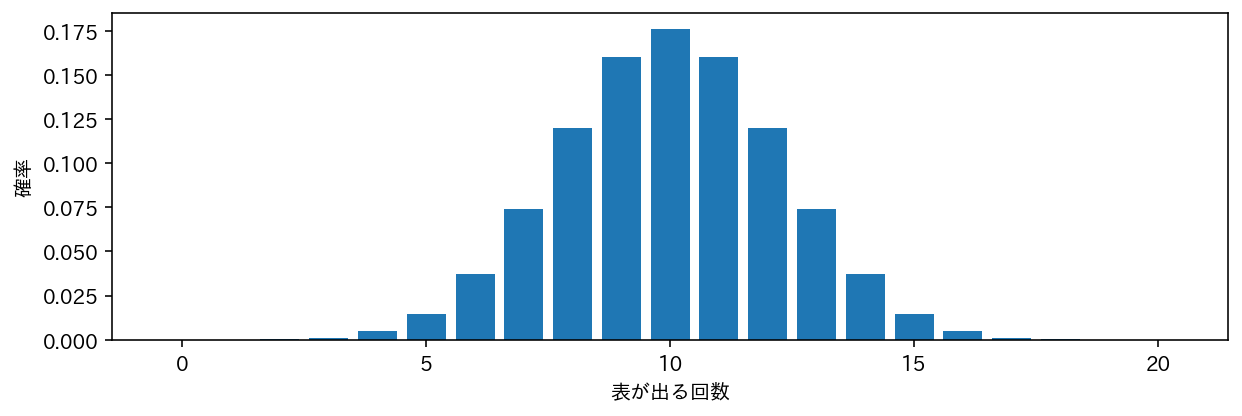

In [5]:
plt.figure(figsize=(10, 3))
plt.bar(x, y)
plt.xlabel('表が出る回数')
plt.ylabel('確率')

In [6]:
import pandas as pd
p_value = pd.DataFrame({'表の出る回数':x, '確率': y}).query(
    '表の出る回数 >= 15'
)['確率'].sum()
print(p_value)

0.02069473266601554


In [7]:
import pandas as pd
p_value = pd.DataFrame({'表の出る回数':x, '確率': y}).query('表の出る回数 >= 15')['確率'].sum()
print('{:,.4f}'.format(p_value))

0.0207


In [8]:
a = [40, 165]
b = [62, 228]

In [9]:
print('Sample A: size={}, converted={}, mean={:.3f}'.format(sum(a), a[0], a[0]/sum(a)))
print('Sample B: size={}, converted={}, mean={:.3f}'.format(sum(b), b[0], b[0]/sum(b)))

Sample A: size=205, converted=40, mean=0.195
Sample B: size=290, converted=62, mean=0.214


In [10]:
x = np.linspace(0, 1, 200)

# 流入元がAのサンプル
n = sum(a)
p = a[0]/n
std = np.sqrt(p*(1-p)/n)
y_a = scipy.stats.norm.pdf(x, p, std)

# 流入元がBのサンプル
n = sum(b)
p = b[0]/n
std = np.sqrt(p*(1-p)/n)
y_b = scipy.stats.norm.pdf(x, p, std)

Text(0, 0.5, '尤度')

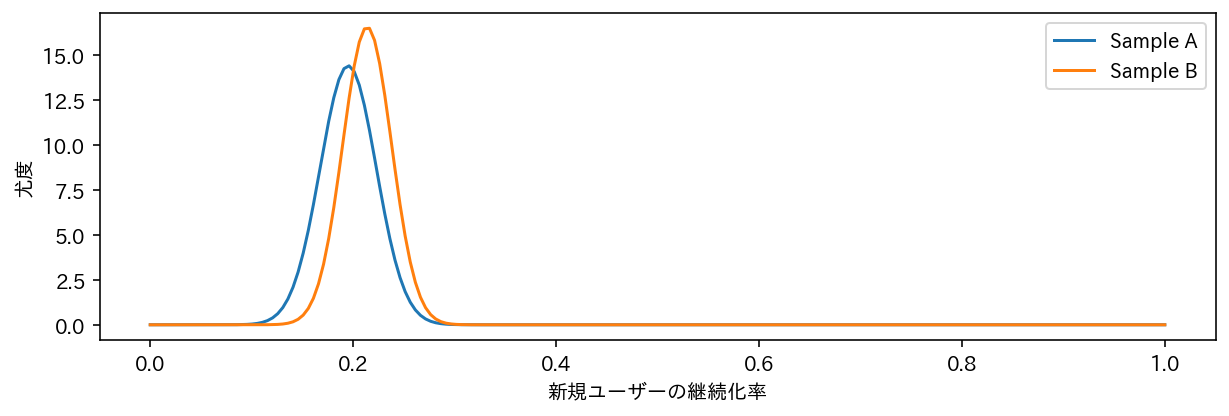

In [11]:
plt.figure(figsize=(10, 3))
plt.plot(x, y_a, label='Sample A')
plt.plot(x, y_b, label='Sample B')
plt.legend(loc='best')
plt.xlabel('新規ユーザーの継続化率')
plt.ylabel('尤度')

In [12]:
print(scipy.stats.chi2_contingency.__doc__)

Chi-square test of independence of variables in a contingency table.

    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::

        dof = observed.size - sum(observed.shape) + observed.ndim - 1


    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    correction : bool, optional
        If True, *and* the degrees of freedom is 1, apply Yates' correction
        for continuity.  The effect of the c

In [13]:
# カイ二乗検定
_, p_value, _, _ = scipy.stats.chi2_contingency([a, b])
print(p_value)

0.694254736449269


In [14]:
np.random.seed(34)

In [15]:
mu = 0.5 # 表が出る確率50%
init_sample = list(scipy.stats.bernoulli.rvs(mu, size=20))

sample = init_sample
p_value_history = []
for i in range(200):
    # 直近20回の結果を使って検定
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)
    p_value_history.append(p_value)
    # 新たにコインを投げて結果を保持
    sample.append(scipy.stats.bernoulli.rvs(mu))

Text(0, 0.5, 'p値')

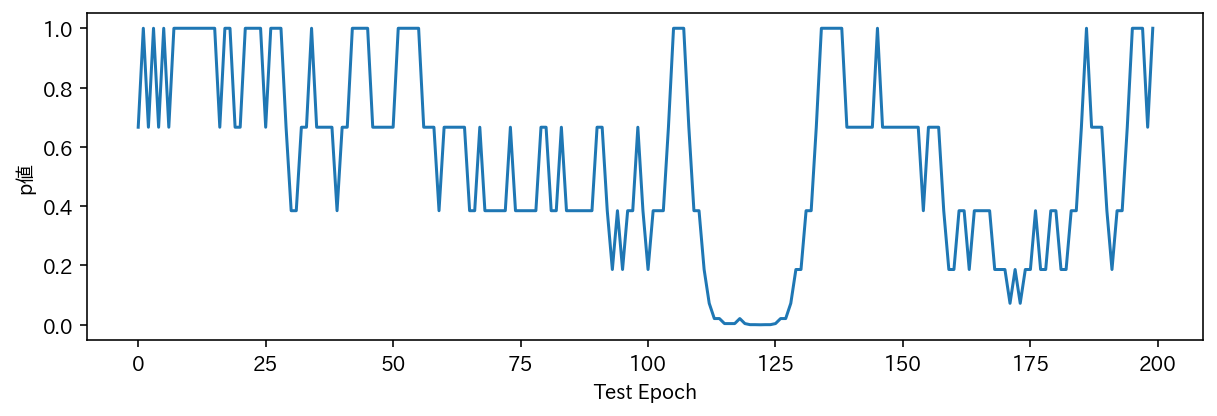

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(p_value_history)
plt.xlabel('Test Epoch')
plt.ylabel('p値')

In [17]:
np.random.seed(31)
max_sample = 3000000
# サンプルA 平均:45.1%
a = scipy.stats.bernoulli.rvs(0.451, size=max_sample)
# サンプルB 平均:45.2%
b = scipy.stats.bernoulli.rvs(0.452, size=max_sample)
p_values = []
# 5000づつサンプルサイズを増やして検定を行なう
sample_sizes = np.arange(1000, max_sample, 5000)
for sample_size in sample_sizes:
    _, p_value = scipy.stats.ttest_ind(a[:sample_size], b[:sample_size], equal_var=False)
    p_values.append(p_value)

Text(0, 0.5, 'p値')

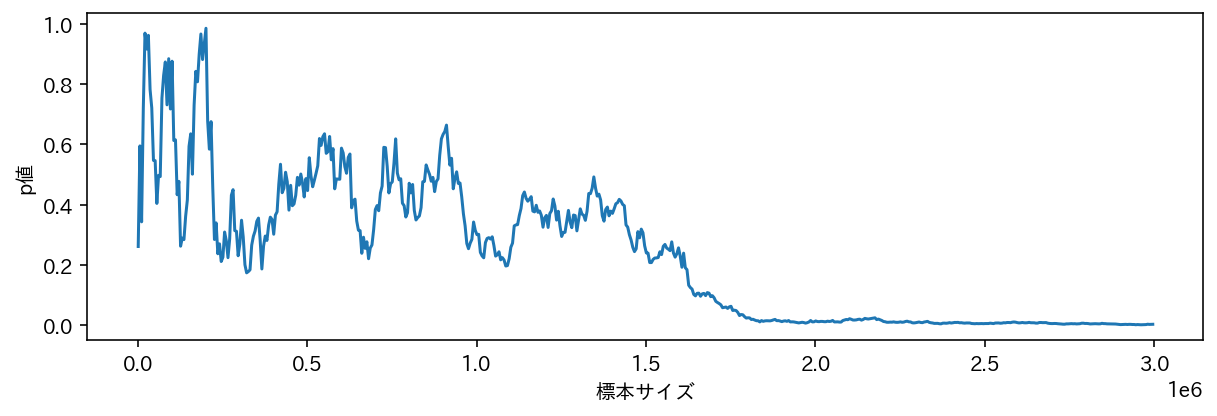

In [18]:
plt.figure(figsize=(10, 3))
plt.plot(sample_sizes, p_values)
plt.xlabel('標本サイズ')
plt.ylabel('p値')

In [19]:
from statsmodels.stats.proportion import proportion_confint

# Wilson Score Intervalを利用して95%信頼区間を求める
a_lower, a_upper = proportion_confint(sum(a), len(a), alpha=0.05, method='wilson')
b_lower, b_upper = proportion_confint(sum(b), len(b), alpha=0.05, method='wilson')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, '母平均')

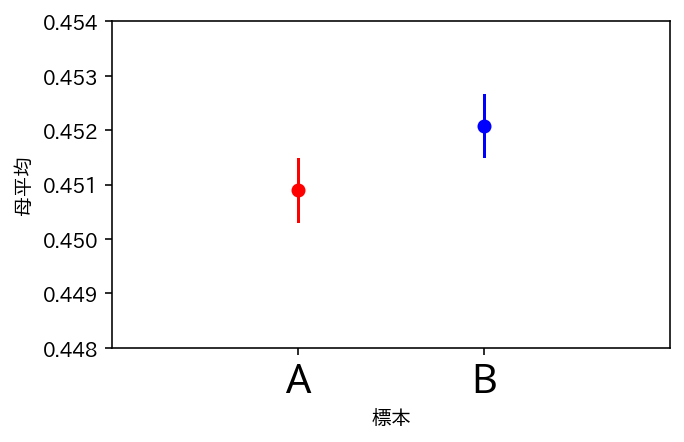

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(1, np.mean(a), 'ro')
plt.plot(2, np.mean(b), 'bo')
plt.plot([1, 1], [a_lower, a_upper], 'r-')
plt.plot([2, 2], [b_lower, b_upper], 'b-')
plt.ylim(0.448, 0.454)
plt.xlim(0, 3)
plt.xticks([1, 2], ['A','B'], fontsize=20)
plt.xlabel('標本')
plt.ylabel('母平均')

Text(0, 0.5, '誤った発見をする確率')

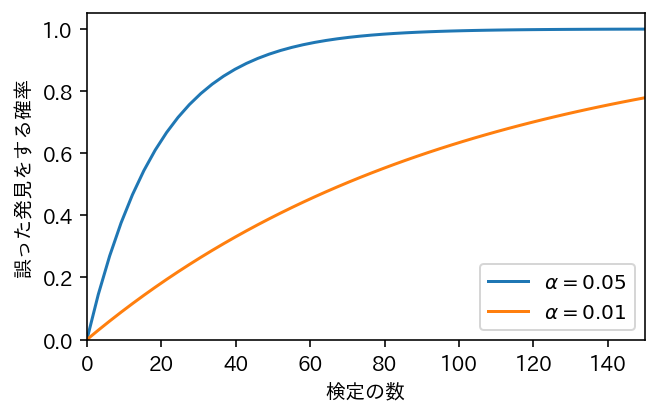

In [21]:
plt.figure(figsize=(5, 3))
x = np.linspace(0, 150)
plt.plot(x, 1 - (1 - 0.05)**x, label=r'$\alpha=0.05$')
plt.plot(x, 1 - (1 - 0.01)**x, label=r'$\alpha=0.01$')
plt.legend(loc='best')
plt.ylim(0, 1.05)
plt.xlim(0, 150)
plt.xlabel('検定の数')
plt.ylabel('誤った発見をする確率')

In [22]:
import datetime as dt

In [23]:
x = pd.date_range(dt.datetime(2017, 3, 1), dt.datetime(2017, 4, 1))
y = np.random.randn(len(x)) * 20 + 1000
y2 = np.random.randn(len(x)) * 20 + 1000

In [24]:
y_change = list(np.zeros(int(len(x)/2))) + list(np.ones(int(len(x)/2)) + 200)

In [25]:
y_change2 = list(np.zeros(int(len(x)/2))) + list(np.ones(int(len(x)/2)).cumsum() * 7)

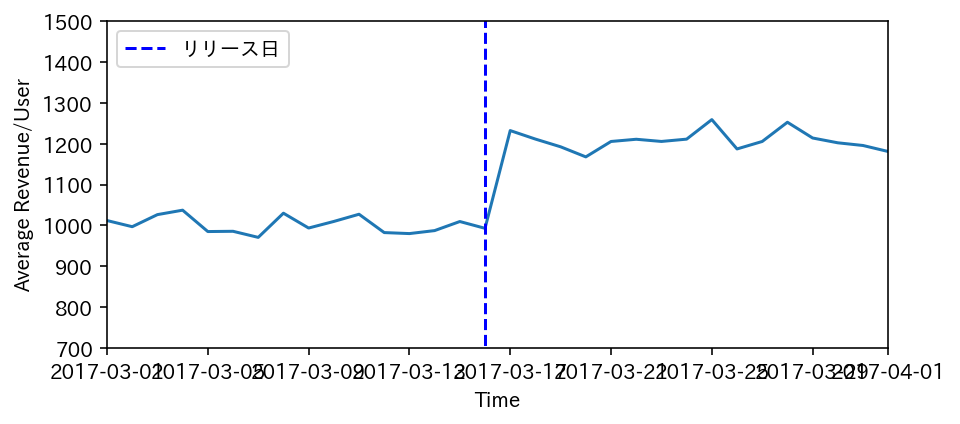

In [26]:
plt.figure(figsize=(7, 3))
plt.plot(x, y + y_change)
plt.ylim(700, 1500)
plt.xlabel('Time')
plt.xlim(x[0], x[-1])
plt.ylabel('Average Revenue/User')
plt.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--', label='リリース日')
plt.legend(loc='upper left')

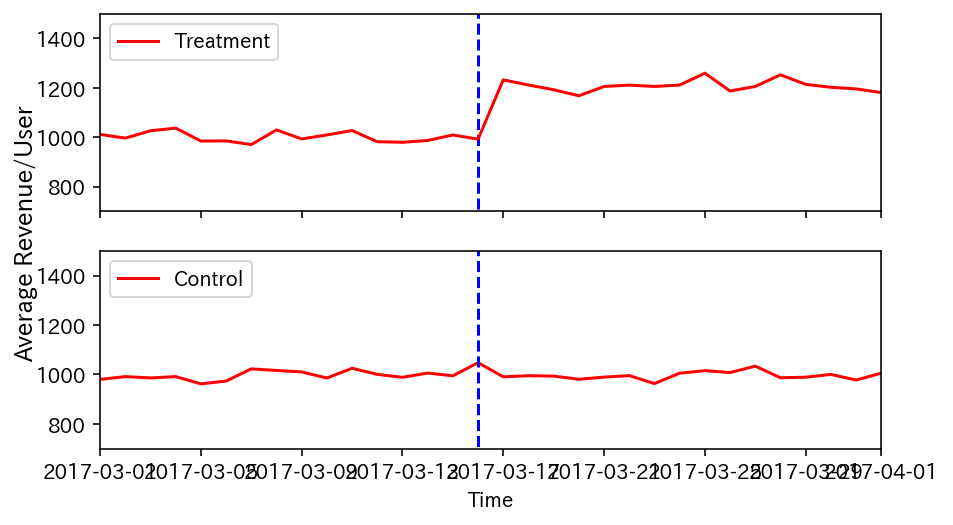

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 4))
ax1.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--')
ax1.plot(x, y + y_change, 'r-', label='Treatment')
ax1.set_ylim(700, 1500)
ax2.plot(x, y2, 'r-', label='Control')
ax1.legend(loc='upper left')
ax2.plot([dt.datetime(2017,3,16), dt.datetime(2017,3,16)], [0, 2000], 'b--')
ax2.set_ylim(700, 1500)
plt.xlabel('Time')
ax1.set_xlim(x[0], x[-1])
ax2.set_xlim(x[0], x[-1])
fig.text(0.04, 0.5, 'Average Revenue/User', va='center', rotation='vertical', fontsize=12)
plt.legend(loc='upper left')